In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("laptop_price.csv",encoding=("ISO-8859-1"))
df.shape


(1303, 13)

In [3]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.corr()

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [8]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [9]:
df['Price_rup']=df['Price_euros']*89.2
df['Price_rup']

0       119500.348
1        80185.448
2        51290.000
3       226340.540
4       160881.120
           ...    
1298     56909.600
1299    133710.800
1300     20426.800
1301     68148.800
1302     32914.800
Name: Price_rup, Length: 1303, dtype: float64

In [10]:
df.drop(columns=['Price_euros'],inplace=True)

# There is a no use of laptop_ID so we remove this feature

In [11]:
df.drop(columns='laptop_ID',inplace=True)

In [12]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rup
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119500.348
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80185.448
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51290.000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226340.540
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160881.120
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,56909.600
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,133710.800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20426.800
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,68148.800


# Company

In [13]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [14]:
df1=df['Company'].value_counts()
df1

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

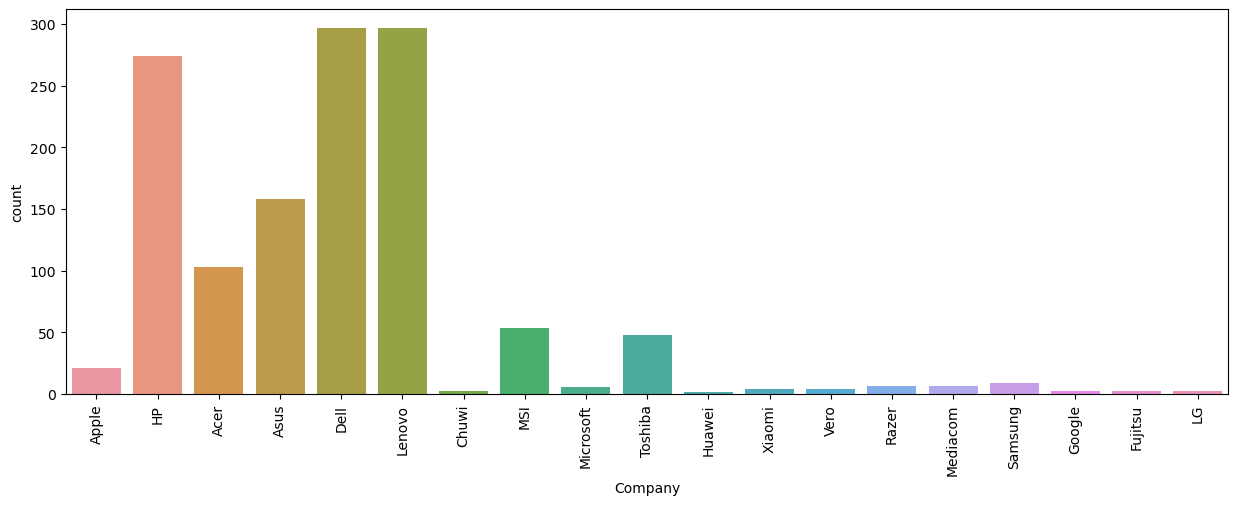

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='Company',data=df)
plt.xticks(rotation='vertical')
plt.show()

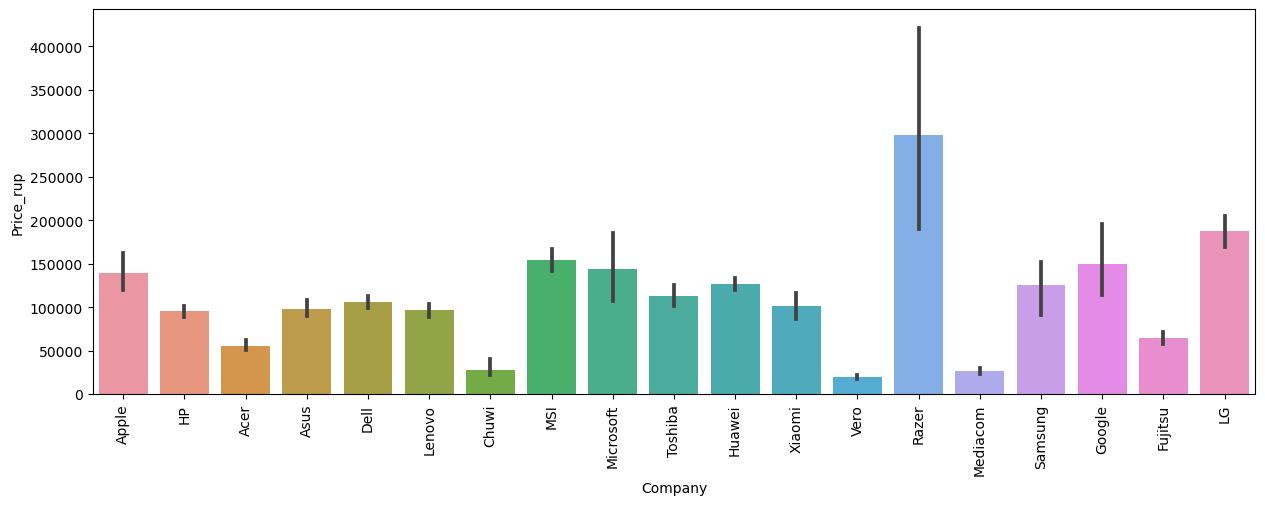

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='Company',y='Price_rup',data=df)
plt.xticks(rotation='vertical')
plt.show()

# observation:
1. most of the laptop lying under the 5 companies:  Dell,Lenovo,HP,Asus,Acer
2. Razer, LG company laptops are very costly 
    

# Ram feature

In [17]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [18]:
# value counts
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

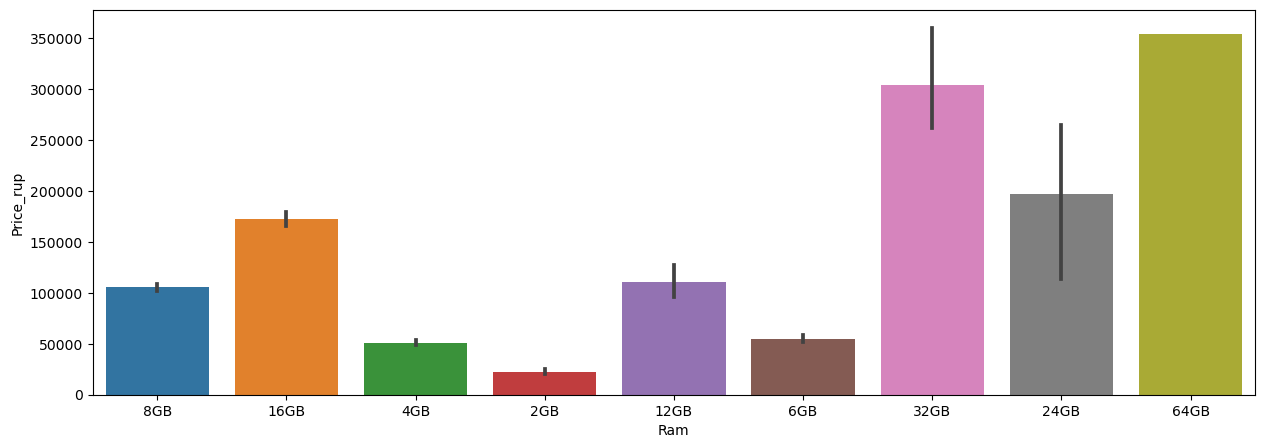

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='Ram',y='Price_rup',data=df)
plt.show()

In [20]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [21]:
df['Ram'].dtype

dtype('O')

In [79]:
df['Ram']=df['Ram'].astype('int')

In [81]:
df.drop(columns=['Product'],inplace=True)

# Weight

In [65]:
df['Weight']=df['Weight'].str.replace('kg','')

In [66]:
df['Weight']=df['Weight'].astype('float')
df['Weight'].dtype

dtype('float64')

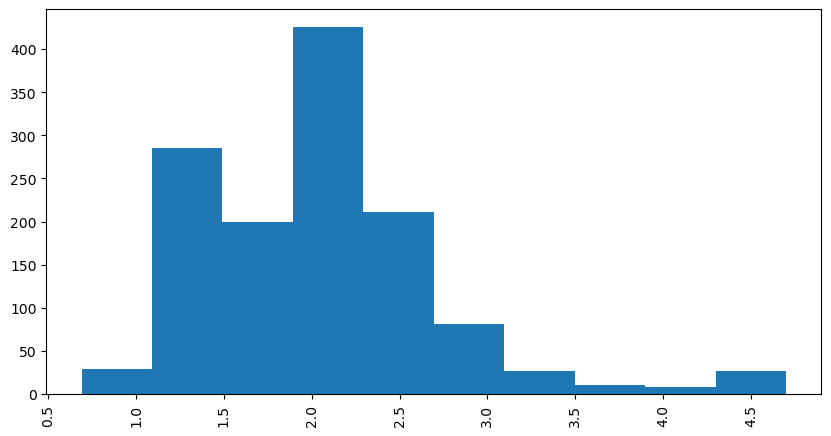

In [54]:
plt.figure(figsize=(10,5))
plt.hist(df['Weight'],bins=10)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_rup         1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# feature engineering on ScreenResolution

In [24]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

# Obserbation 
Here we extract following problem

1. IPS Resolution

2. Touchscreen

3. Size like x_res and y_res (3200x1800)

In [25]:
df['IPS']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [26]:
df['IPS']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

In [27]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [28]:
df['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [29]:
df['X_res']=df['ScreenResolution'].str.split("x").str[0].str.split().str[-1]
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [30]:
df['Y_res']=df['ScreenResolution'].str.split("x").str[1]
df['Y_res']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_res, Length: 1303, dtype: object

In [31]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [32]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rup,IPS,Touchscreen,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119500.348,1,0,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80185.448,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51290.000,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226340.540,1,0,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160881.120,1,0,2560,1600


In [33]:
df.drop(columns='ScreenResolution',inplace=True)

In [81]:
df

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rup,IPS,Touchscreen,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119500.348,1,0,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,80185.448,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51290.000,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,226340.540,1,0,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160881.120,1,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,56909.600,1,1,1920,1080
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,133710.800,1,1,3200,1800
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,20426.800,0,0,1366,768
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,68148.800,0,0,1366,768


In [35]:
df['PPI']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')
df['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [36]:
df[[ 'IPS', 'Touchscreen', 'X_res', 'Y_res']]

,IPS,Touchscreen,X_res,Y_res
0,1,0,2560,1600
1,0,0,1440,900
2,0,0,1920,1080
3,1,0,2880,1800
4,1,0,2560,1600
...,...,...,...,...
1298,1,1,1920,1080
1299,1,1,3200,1800
1300,0,0,1366,768
1301,0,0,1366,768


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram          1303 non-null   object 
 6   Memory       1303 non-null   object 
 7   Gpu          1303 non-null   object 
 8   OpSys        1303 non-null   object 
 9   Weight       1303 non-null   object 
 10  Price_rup    1303 non-null   float64
 11  IPS          1303 non-null   int64  
 12  Touchscreen  1303 non-null   int64  
 13  X_res        1303 non-null   int32  
 14  Y_res        1303 non-null   int32  
 15  PPI          1303 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(9)
memory usage: 152.8+ KB


# feature Engineering on CPU

In [38]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

# Obserbation 
We extract the  processor like -

1. Intel Core i3, Intel Core i5,Intel Core i7

2. Other Intel 

3. AMD

In [39]:
df['CPU_Name']=df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))

In [40]:
df['CPU_Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: CPU_Name, Length: 1303, dtype: object

In [41]:
def fetch_processor(text):
    if text=='Intel Core i3' or text=="Intel Core i5" or text=="Intel Core i7":
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel processor'
        else:
            return 'AMD Processor'

In [42]:
df['CPU_Brand']=df['CPU_Name'].apply(fetch_processor)

In [43]:
df['CPU_Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Brand, dtype: int64

In [44]:
df.drop(columns=['CPU_Name','Cpu'],inplace=True)

In [45]:
df.head(5)

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_rup,IPS,Touchscreen,X_res,Y_res,PPI,CPU_Brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119500.348,1,0,2560,1600,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80185.448,0,0,1440,900,127.677940,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51290.000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,226340.540,1,0,2880,1800,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160881.120,1,0,2560,1600,226.983005,Intel Core i5


# Feature Engineering on Memory

In [46]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

# Obserbation 
we want to extract following storage from the memory feature 

1. SSD

2. HDD

3. Hybrid 

4. Flesh Storage

In [47]:
df['Memory']=df['Memory'].astype('str').replace('\.0','',regex=True)

In [48]:
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

In [49]:
df1=df['Memory'].str.split('+',n=1,expand=True)
df1

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [50]:
df['first']=df1[0]
df['second']=df1[1]

In [51]:
df['first']=df['first'].str.strip()

In [52]:
df['HDD1']=df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['SSD1']=df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['Hybrid1']=df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
df['Flesh_storage']=df['first'].apply(lambda x : 1 if 'Flesh Storage' in x else 0)

In [53]:
df['first']=df['first'].str.replace(r"\D",'')

In [54]:
df['second'].fillna("0",inplace=True)

In [55]:
df['HDD2']=df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['SSD2']=df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['Hybrid2']=df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
df['Flesh_storage2']=df['first'].apply(lambda x : 1 if 'Flesh Storage' in x else 0)

In [56]:
df['second']=df['second'].str.replace(r'\D','')

In [57]:
df['first']=df['first'].astype('int')
df['second']=df['second'].astype('int')

In [58]:
pd.set_option('display.max_columns',None)

In [59]:
df.head(2)

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_rup,IPS,Touchscreen,X_res,Y_res,PPI,CPU_Brand,first,second,HDD1,SSD1,Hybrid1,Flesh_storage,HDD2,SSD2,Hybrid2,Flesh_storage2
0,Apple,MacBook Pro,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119500.348,1,0,2560,1600,226.983005,Intel Core i5,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80185.448,0,0,1440,900,127.677940,Intel Core i5,128,0,0,0,0,0,0,0,0,0


In [60]:
df['HDD']=df['first']*df['HDD1']+df['second']*df['HDD2']
df['SSD']=df['first']*df['SSD1']+df['second']*df['SSD2']
df['Hybrid']=df['first']*df['Hybrid1']+df['second']*df['Hybrid2']
df['Flesh_Storage']=df['first']*df['Flesh_storage']+df['second']*df['Flesh_storage2']

In [61]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price_rup', 'IPS', 'Touchscreen', 'X_res', 'Y_res',
       'PPI', 'CPU_Brand', 'first', 'second', 'HDD1', 'SSD1', 'Hybrid1',
       'Flesh_storage', 'HDD2', 'SSD2', 'Hybrid2', 'Flesh_storage2', 'HDD',
       'SSD', 'Hybrid', 'Flesh_Storage'],
      dtype='object')

In [62]:
df.drop(columns=['first', 'second', 'HDD1', 'SSD1', 'Hybrid1','Flesh_storage', 'HDD2', 'SSD2', 'Hybrid2', 'Flesh_storage2'],inplace=True)

In [63]:
df.drop(columns=['Memory','Inches','X_res','Y_res'],inplace=True)

In [67]:
df

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_rup,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Hybrid,Flesh_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,119500.348,1,0,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,80185.448,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,51290.000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,226340.540,1,0,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,160881.120,1,0,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,56909.600,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,133710.800,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,Intel HD Graphics,Windows 10,1.50,20426.800,0,0,111.935204,Other Intel processor,0,0,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,68148.800,0,0,100.454670,Intel Core i7,1000,0,0,0


# Gpu (Feature Engineering)

In [68]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [71]:
df['Gpu_Brand']=df['Gpu'].str.split().str[0]
df['Gpu_Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu_Brand, Length: 1303, dtype: object

In [72]:
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [75]:
df=df[df['Gpu_Brand']!='ARM']

In [77]:
df.drop(columns=['Gpu'],inplace=True)

In [82]:
df

,Company,TypeName,Ram,OpSys,Weight,Price_rup,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Hybrid,Flesh_Storage,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,119500.348,1,0,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,80185.448,0,0,127.677940,Intel Core i5,0,0,0,0,Intel
2,HP,Notebook,8,No OS,1.86,51290.000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,226340.540,1,0,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,160881.120,1,0,226.983005,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,56909.600,1,1,157.350512,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,133710.800,1,1,276.053530,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,20426.800,0,0,111.935204,Other Intel processor,0,0,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,68148.800,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD


# OpSys (Feature Engineering)

In [83]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [84]:
def categori_opsys(text):
    if text=='Windows 10' or text=='Windows 10 S' or text=='Windows 7':
        return "Windows"
    elif text=='macOS'or text=='Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'

In [85]:
df['Os']=df['OpSys'].apply(categori_opsys)

In [86]:
df['Os'].value_counts()

Windows              1125
Other/No OS/Linux     156
Mac                    21
Name: Os, dtype: int64

In [87]:
df

,Company,TypeName,Ram,OpSys,Weight,Price_rup,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Hybrid,Flesh_Storage,Gpu_Brand,Os
0,Apple,Ultrabook,8,macOS,1.37,119500.348,1,0,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,80185.448,0,0,127.677940,Intel Core i5,0,0,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,51290.000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,226340.540,1,0,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,160881.120,1,0,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,56909.600,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,133710.800,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,2,Windows 10,1.50,20426.800,0,0,111.935204,Other Intel processor,0,0,0,0,Intel,Windows
1301,HP,Notebook,6,Windows 10,2.19,68148.800,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


In [88]:
df.drop(columns=['OpSys'],inplace=True)

In [90]:
df.head(3)

,Company,TypeName,Ram,Weight,Price_rup,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Hybrid,Flesh_Storage,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,119500.348,1,0,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,80185.448,0,0,127.677940,Intel Core i5,0,0,0,0,Intel,Mac
2,HP,Notebook,8,1.86,51290.000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float64
 4   Price_rup      1302 non-null   float64
 5   IPS            1302 non-null   int64  
 6   Touchscreen    1302 non-null   int64  
 7   PPI            1302 non-null   float64
 8   CPU_Brand      1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SSD            1302 non-null   int64  
 11  Hybrid         1302 non-null   int64  
 12  Flesh_Storage  1302 non-null   int64  
 13  Gpu_Brand      1302 non-null   object 
 14  Os             1302 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 157.7+ KB


# EDA(Exploratory Data Analysis)

In [165]:
feature=df.columns
feature

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_rup', 'IPS',
       'Touchscreen', 'PPI', 'CPU_Brand', 'HDD', 'SSD', 'Gpu_Brand', 'Os'],
      dtype='object')

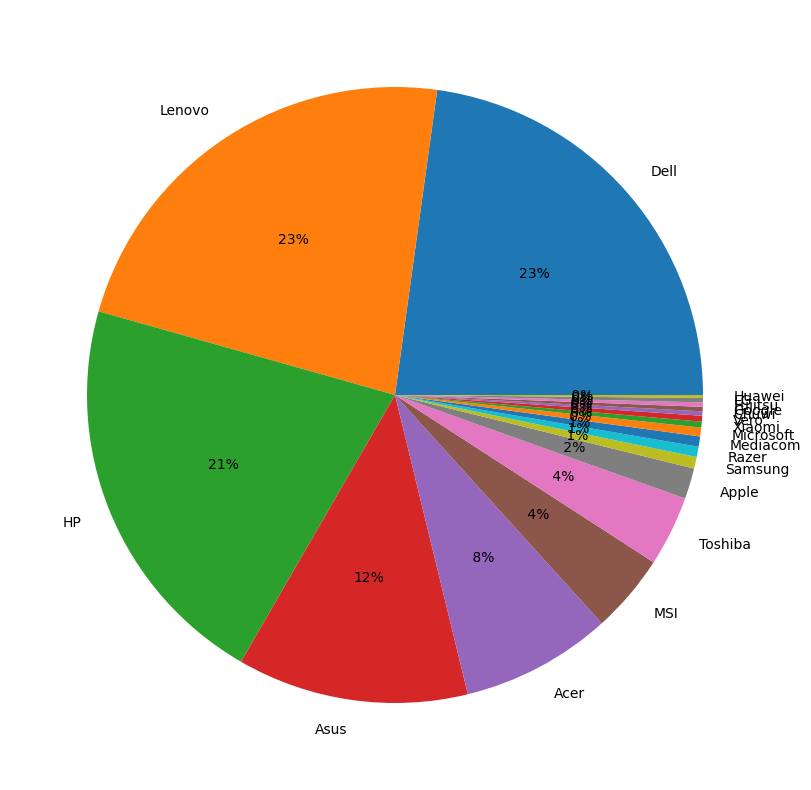

In [107]:
plt.figure(figsize=(15,10))
plt.pie(df['Company'].value_counts(),labels=df['Company'].value_counts().keys(),autopct='%2.f%%')
plt.show()

<Axes: >

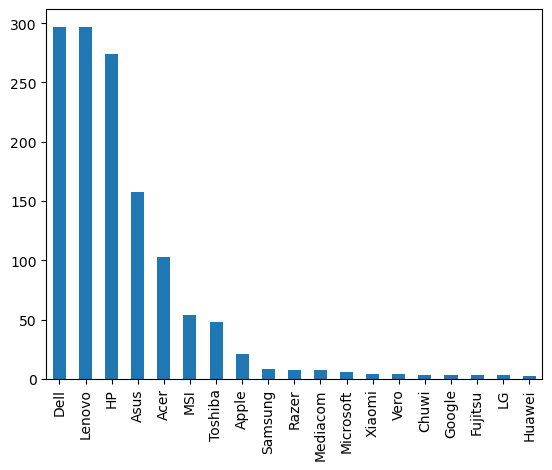

In [113]:
df['Company'].value_counts().plot(kind='bar')

<Axes: >

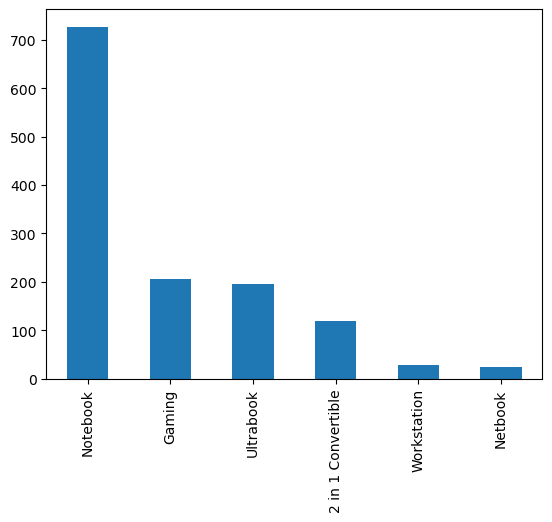

In [114]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName', ylabel='Price_rup'>

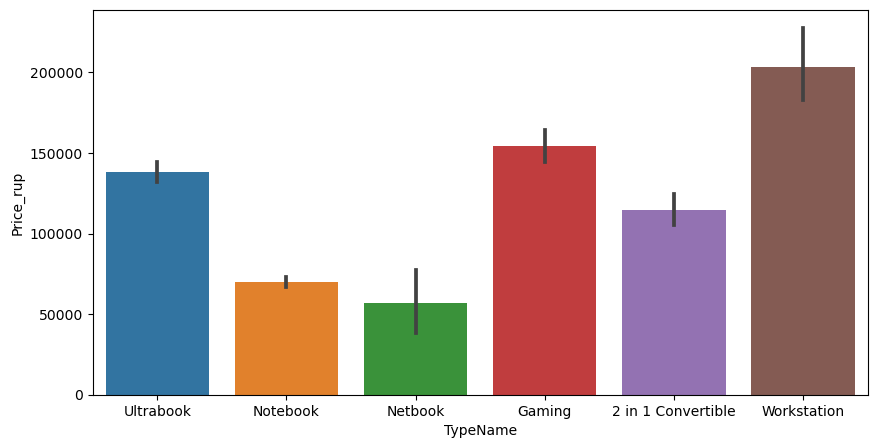

In [120]:
# price depends on Typename
plt.figure(figsize=(10,5))
sns.barplot(x=df['TypeName'],y=df['Price_rup'],data=df)

<Axes: xlabel='Company', ylabel='Price_rup'>

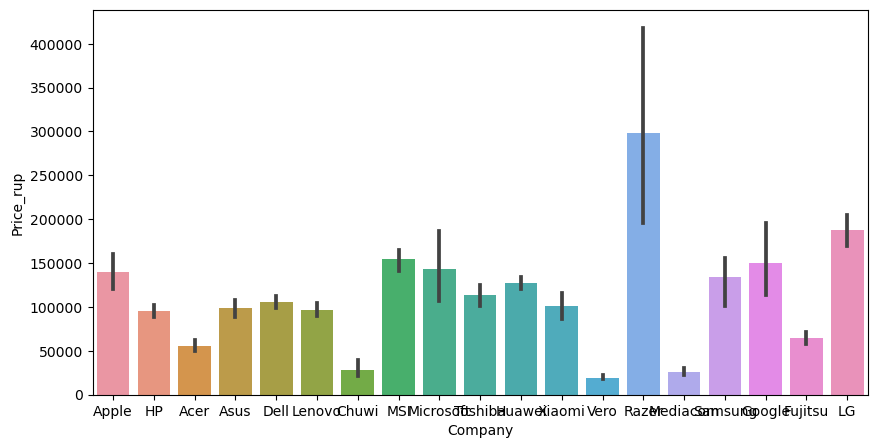

In [121]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Company'],y=df['Price_rup'],data=df)

<Axes: xlabel='Ram', ylabel='Price_rup'>

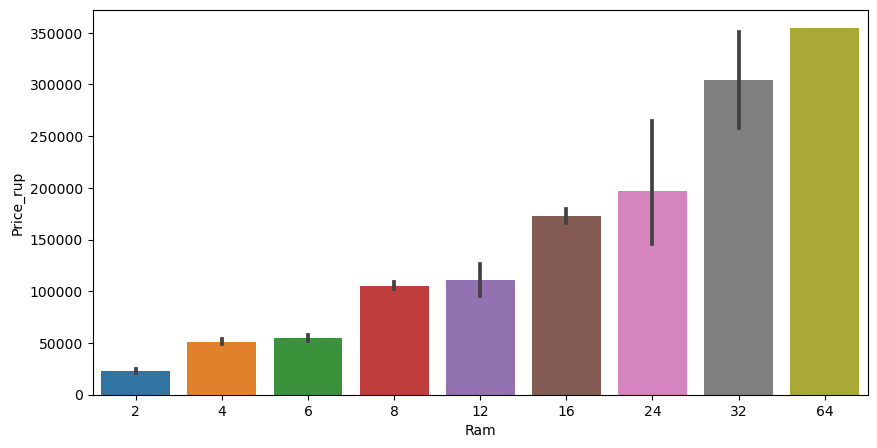

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Ram'],y=df['Price_rup'],data=df)

In [123]:
feature

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_rup', 'IPS',
       'Touchscreen', 'PPI', 'CPU_Brand', 'HDD', 'SSD', 'Hybrid',
       'Flesh_Storage', 'Gpu_Brand', 'Os'],
      dtype='object')

<Axes: xlabel='Weight', ylabel='Price_rup'>

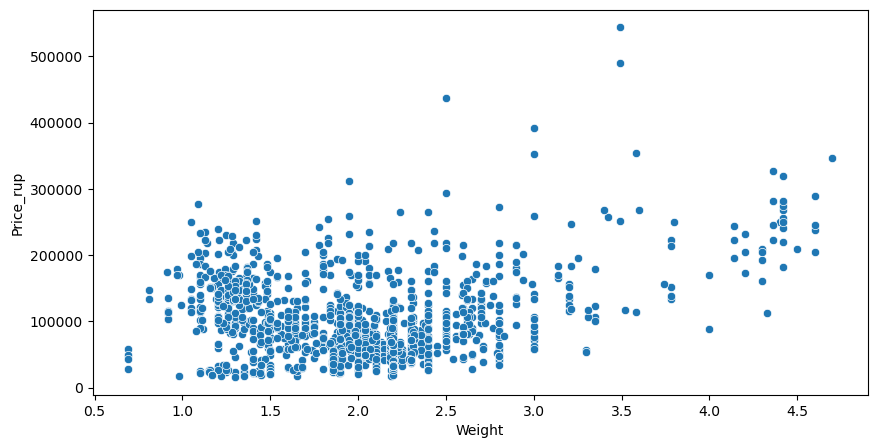

In [124]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Weight'],y=df['Price_rup'],data=df)

<Axes: ylabel='Density'>

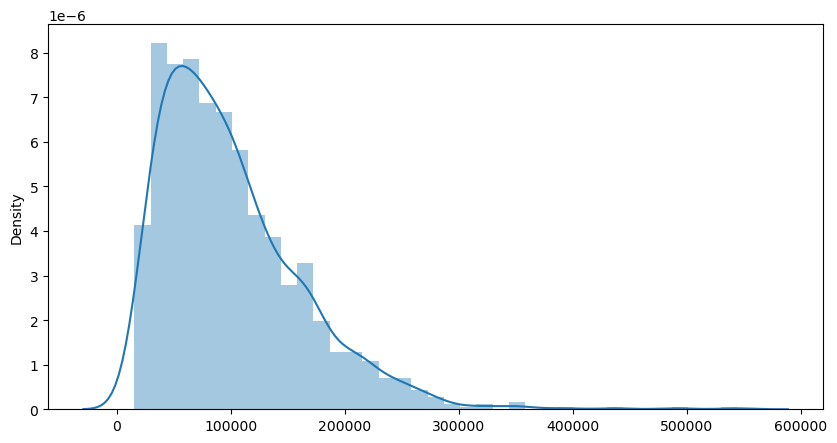

In [129]:
plt.figure(figsize=(10,5))
sns.distplot(x=df['Price_rup'])

<Axes: ylabel='Density'>

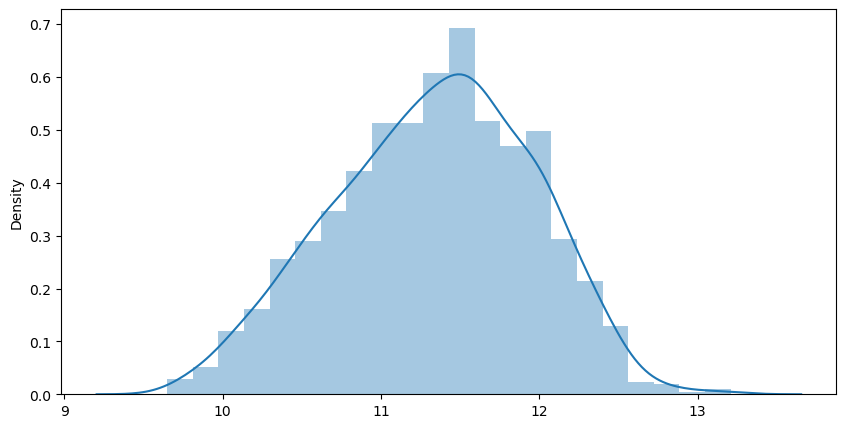

In [130]:
plt.figure(figsize=(10,5))
sns.distplot(x=np.log(df['Price_rup']))

In [131]:
df.corr()

,Ram,Weight,Price_rup,IPS,Touchscreen,PPI,HDD,SSD,Hybrid,Flesh_Storage
Ram,1.000000,0.383362,0.742905,0.207949,0.118875,0.305688,-0.237615,0.604088,-0.013845,NaN
Weight,0.383362,1.000000,0.209867,0.018643,-0.293004,-0.321883,0.180980,-0.063507,0.034409,NaN
Price_rup,0.742905,0.209867,1.000000,0.253320,0.192917,0.475368,-0.380836,0.676066,-0.040199,NaN
IPS,0.207949,0.018643,0.253320,1.000000,0.148026,0.299142,-0.189876,0.228870,-0.054151,NaN
Touchscreen,0.118875,-0.293004,0.192917,0.148026,1.000000,0.458571,-0.125462,0.256758,-0.036043,NaN
PPI,0.305688,-0.321883,0.475368,0.299142,0.458571,1.000000,-0.348963,0.515149,-0.013974,NaN
HDD,-0.237615,0.180980,-0.380836,-0.189876,-0.125462,-0.348963,1.000000,-0.570136,-0.050065,NaN
SSD,0.604088,-0.063507,0.676066,0.228870,0.256758,0.515149,-0.570136,1.000000,-0.086052,NaN
Hybrid,-0.013845,0.034409,-0.040199,-0.054151,-0.036043,-0.013974,-0.050065,-0.086052,1.000000,NaN
Flesh_Storage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.drop(columns=['Hybrid','Flesh_Storage'],inplace=True)

In [133]:
df.corr()

,Ram,Weight,Price_rup,IPS,Touchscreen,PPI,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.207949,0.118875,0.305688,-0.237615,0.604088
Weight,0.383362,1.000000,0.209867,0.018643,-0.293004,-0.321883,0.180980,-0.063507
Price_rup,0.742905,0.209867,1.000000,0.253320,0.192917,0.475368,-0.380836,0.676066
IPS,0.207949,0.018643,0.253320,1.000000,0.148026,0.299142,-0.189876,0.228870
Touchscreen,0.118875,-0.293004,0.192917,0.148026,1.000000,0.458571,-0.125462,0.256758
PPI,0.305688,-0.321883,0.475368,0.299142,0.458571,1.000000,-0.348963,0.515149
HDD,-0.237615,0.180980,-0.380836,-0.189876,-0.125462,-0.348963,1.000000,-0.570136
SSD,0.604088,-0.063507,0.676066,0.228870,0.256758,0.515149,-0.570136,1.000000


In [138]:
df.var()

Ram            2.585892e+01
Weight         4.425893e-01
Price_rup      3.889389e+09
IPS            2.015654e-01
Touchscreen    1.252735e-01
PPI            1.854940e+03
HDD            1.858633e+05
SSD            3.415978e+04
dtype: float64

<Axes: xlabel='Price_rup'>

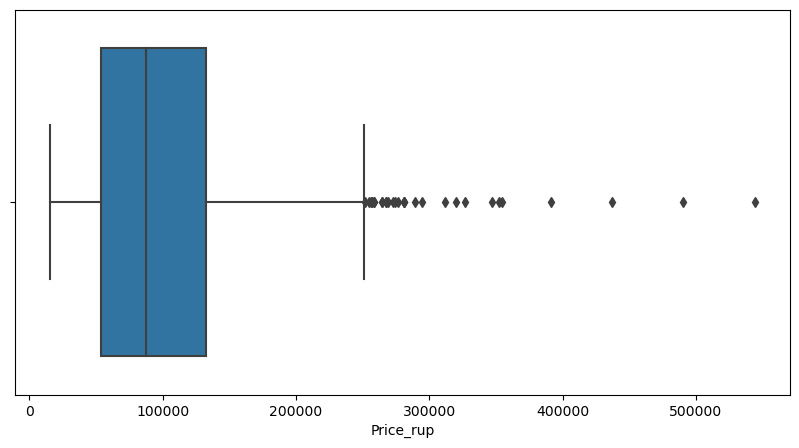

In [139]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price_rup'])

In [153]:
df_temp=df[df['Price_rup']<220000]

<Axes: xlabel='Price_rup'>

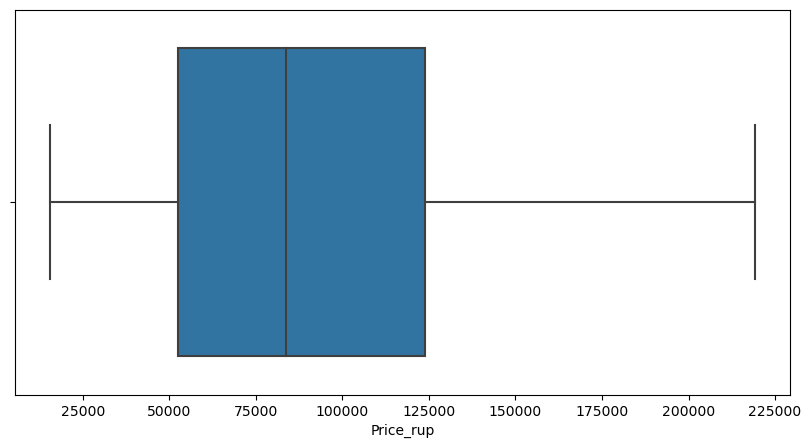

In [154]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_temp['Price_rup'])

<Axes: xlabel='IPS', ylabel='Price_rup'>

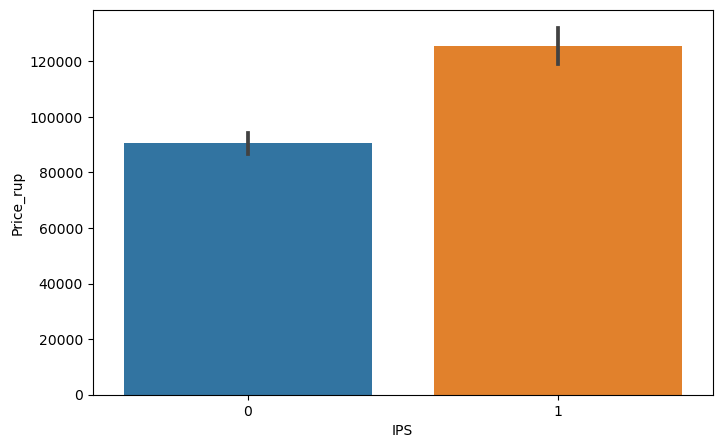

In [159]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['IPS'],y=df['Price_rup'],data=df)

<Axes: xlabel='Touchscreen', ylabel='Price_rup'>

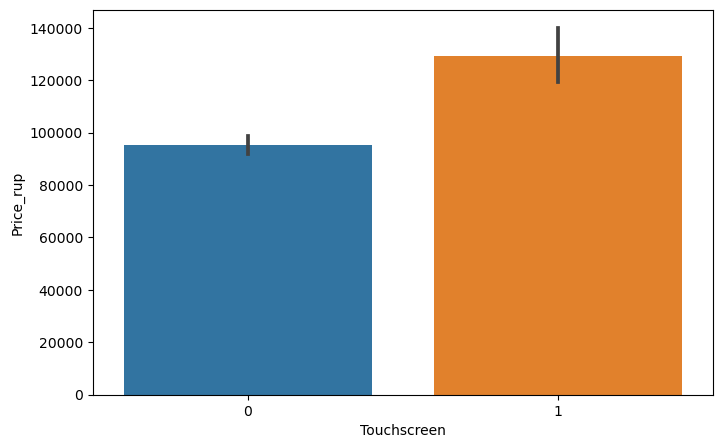

In [160]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Touchscreen'],y=df['Price_rup'],data=df)

<Axes: ylabel='Density'>

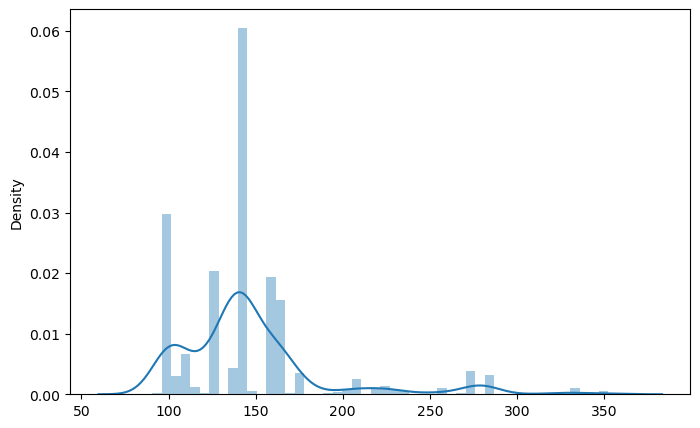

In [163]:
plt.figure(figsize=(8,5))
sns.distplot(x=df['PPI'])

<Axes: xlabel='PPI', ylabel='Price_rup'>

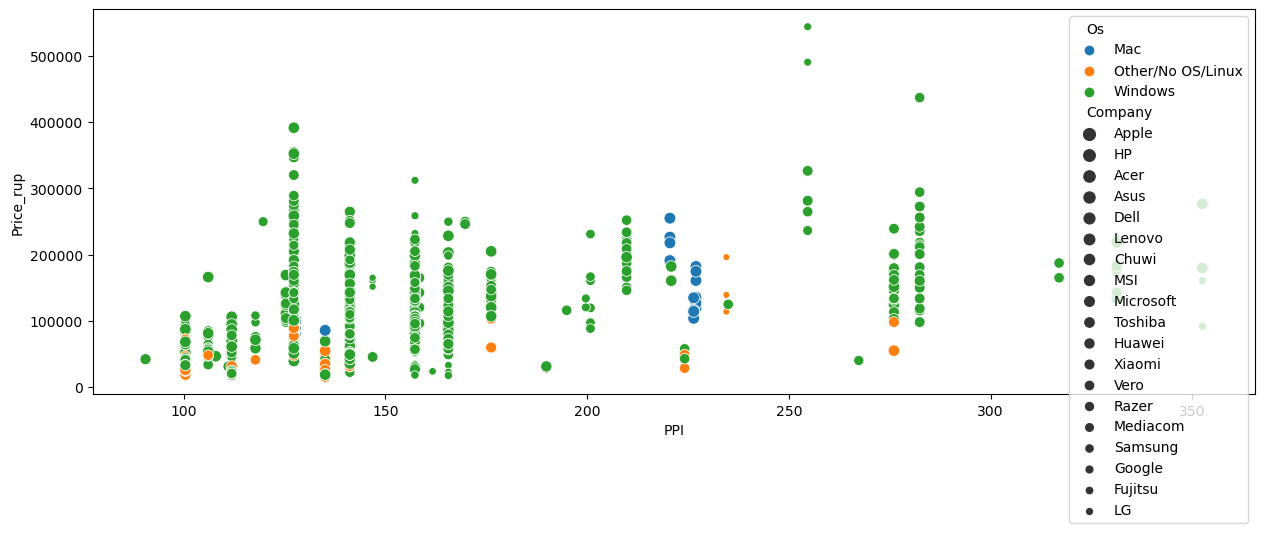

In [178]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['PPI'],y=df['Price_rup'],hue=df.Os,size=df['Company'])

<Axes: >

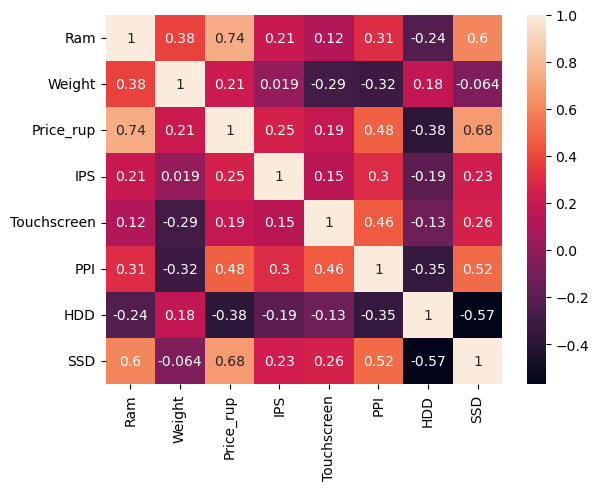

In [182]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Price_rup', ylabel='Density'>

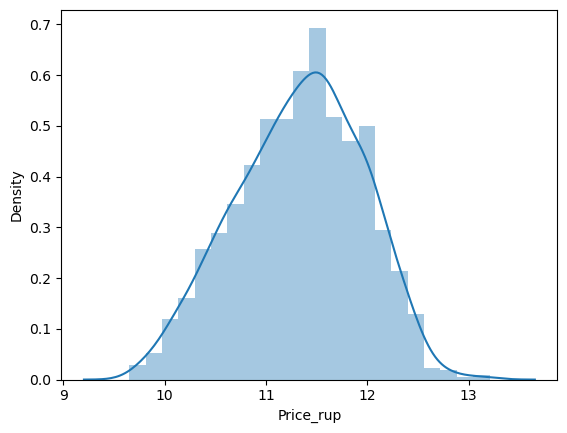

In [183]:
sns.distplot(np.log(df['Price_rup']))

In [184]:
df

,Company,TypeName,Ram,Weight,Price_rup,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,119500.348,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,80185.448,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,51290.000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,226340.540,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,160881.120,1,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,56909.600,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,133710.800,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,20426.800,0,0,111.935204,Other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,68148.800,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [189]:
x=df.drop(columns=['Price_rup'])
x

,Company,TypeName,Ram,Weight,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [190]:
y=np.log(df['Price_rup'])

# Model Building

In [211]:
enc.fit(x)

OneHotEncoder(handle_unknown='ignore')

In [212]:
enc.categories_

[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
        'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
        'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
 array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array([ 2,  4,  6,  8, 12, 16, 24, 32, 64]),
 array([0.69 , 0.81 , 0.91 , 0.92 , 0.97 , 0.98 , 0.99 , 1.05 , 1.08 ,
        1.09 , 1.1  , 1.11 , 1.12 , 1.13 , 1.14 , 1.15 , 1.16 , 1.17 ,
        1.18 , 1.19 , 1.2  , 1.21 , 1.22 , 1.23 , 1.24 , 1.25 , 1.252,
        1.26 , 1.27 , 1.28 , 1.29 , 1.3  , 1.31 , 1.32 , 1.34 , 1.35 ,
        1.36 , 1.37 , 1.38 , 1.39 , 1.4  , 1.41 , 1.42 , 1.43 , 1.44 ,
        1.45 , 1.47 , 1.48 , 1.49 , 1.5  , 1.54 , 1.55 , 1.56 , 1.58 ,
        1.59 , 1.6  , 1.62 , 1.63 , 1.64 , 1.65 , 1.68 , 1.7  , 1.71 ,
        1.74 , 1.75 , 1.76 , 1.78 , 1.79 , 1.8  , 1.83 , 1.84 , 1.85 ,
        1.86 , 1.87 , 1.88 , 1.89 , 1.9  , 1.91 , 1.93 

In [213]:
enc.transform(x)

<1302x276 sparse matrix of type '<class 'numpy.float64'>'
	with 15624 stored elements in Compressed Sparse Row format>

In [214]:
x

,Company,TypeName,Ram,Weight,IPS,Touchscreen,PPI,CPU_Brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [275]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor,BaggingRegressor

# Linear Regression

In [219]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2)])

In [220]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [221]:
y_pred=pipe.predict(X_test)

In [222]:
r2_score(y_test,y_pred)

0.8093270448855489

In [223]:
mean_absolute_error(y_test,y_pred)

0.21343900423151094

In [226]:
pipe.score(X_test,y_test)

0.8093270448855489

# Lasso Regression

In [234]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=Lasso(alpha=0.001)

pipe=Pipeline([('step1',step1),('step2',step2)])


In [235]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', Lasso(alpha=0.001))])

In [236]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('score',pipe.score(X_test,y_test))


R2_score 0.8067822607061899
MAE 0.21587714883549156
score 0.8067822607061899


# Ridge Regression

In [237]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=Ridge(alpha=10)

pipe=Pipeline([('step1',step1),('step2',step2)])


In [238]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', Ridge(alpha=10))])

In [239]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('score',pipe.score(X_test,y_test))

R2_score 0.8026899243391051
MAE 0.2181279193456148
score 0.8026899243391051


# KNN

In [240]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=5)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [241]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', KNeighborsRegressor())])

In [242]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('score',pipe.score(X_test,y_test))

R2_score 0.7692232968870549
MAE 0.22773090845154847
score 0.7692232968870549


# DecisionTree Regressor

In [243]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [244]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', DecisionTreeRegressor(max_depth=8))])

In [245]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('score',pipe.score(X_test,y_test))

R2_score 0.8304374121985467
MAE 0.19680899184017886
score 0.8304374121985467


# SVM

In [255]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [256]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', SVR(C=10000))])

In [257]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('score',pipe.score(X_test,y_test))

R2_score 0.8304559098274477
MAE 0.19589342173835392
score 0.8304559098274477


# RandomForest

In [258]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.7,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [259]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.7,
                                       max_samples=0.5, random_state=3))])

In [260]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2_score 0.8634638070459265
MAE 0.1755413453057785


# Extra Tree

In [266]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.7,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [267]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 ExtraTreesRegressor(max_depth=15, max_features=0.7,
                                     random_state=3))])

In [268]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8770989904626247
MAE 0.1645324468837743


# AdaBoost Regressor

In [269]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=20,learning_rate=1.0)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [270]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', AdaBoostRegressor(n_estimators=20))])

In [271]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7620772875846543
MAE 0.25027346787551824


# GradientBoost

In [276]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)

pipe=Pipeline([('step1',step1),('step2',step2)])

In [277]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', GradientBoostingRegressor(n_estimators=500))])

In [278]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8670404449010197
MAE 0.17294995229762142


# VotingRegressor

In [315]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
gbdt=GradientBoostingRegressor(n_estimators=500)
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.7,max_depth=15)
rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.7,max_depth=15)


step2=VotingRegressor([('gbdt',gbdt),('et',et),('rf',rf)],weights=[40,30,10])


pipe=Pipeline([('step1',step1),('step2',step2)])

In [316]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 VotingRegressor(estimators=[('gbdt',
                                              GradientBoostingRegressor(n_estimators=500)),
                                             ('et',
                                              ExtraTreesRegressor(max_depth=15,
                                                                  max_features=0.7,
                                                                  random_state=3)),
                                             ('rf',
                                              RandomForestRegressor(max_depth=15,
                                                                    max_features=0.7,
                                                                    max_samples=0.5,
                                                                    random_state=3))],
                                 weights=[40, 30, 10]))])

In [317]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8838886932601515
MAE 0.16254656880783572


# Stacking Regressor

In [326]:
step1=ColumnTransformer(transformers=[('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
                                     ],remainder='passthrough')
estimators= [
    
    ('gbdt',GradientBoostingRegressor(n_estimators=500)),
    ('et',ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.7,max_depth=15)),
    ('rf',RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.7,max_depth=15))
]


step2=StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))


pipe=Pipeline([('step1',step1),('step2',step2)])

In [327]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 StackingRegressor(estimators=[('gbdt',
                                                GradientBoostingRegressor(n_estimators=500)),
                                               ('et',
                                                ExtraTreesRegressor(max_depth=15,
                                                                    max_features=0.7,
                                                                    random_state=3)),
                                               ('rf',
                                                RandomForestRegressor(max_depth=15,
                                                                      max_features=0.7,
                                                                      max_samples=0.5,
                                                                      random_state=3))],
                                   final_estimator=Ridge(alpha=100)))])

In [328]:
y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8731218376717489
MAE 0.17208395434235016


# After building  the all model 

# We select the best accuracy model for the deployment